In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import mercury as mr # for widgets



In [3]:
df_retail = pd.read_csv(r'comportamiento-empresas.csv')
df_dolar = pd.read_csv(r'dolar.txt')
df_indices = pd.read_csv(r'indices.csv')
df_financieras = pd.read_csv('reclamosFinancieros.csv')

df_retail['name'] = df_retail['name'].str.upper()
df_retail['year'] = round(df_retail['year']).astype(int)

remove_2023_mask = df_retail['year'] < 2023
df_retail = df_retail[remove_2023_mask]

remove_2023_mask = df_financieras['year'] < 2023
df_financieras = df_financieras[remove_2023_mask]

#empresas_unicas = df_retail['name'].unique()
#empresas_dropdown = widgets.Dropdown(options=empresas_unicas, description='Empresa:')



In [4]:
app = mr.App(title="LAB ZTZ", description="Samples app in Mercury")

datasets = {'Financieras': df_financieras, 'Retail': df_retail}
mercado_select = mr.Select(label="Mercado", value=list(datasets.keys())[0], choices=datasets.keys())

mercury.App

mercury.Select

In [5]:
df_empresas = datasets[mercado_select.value]

In [7]:

empresas_unicas = df_empresas['name'].unique()
empresa_select = mr.Select(label="Empresa", value=empresas_unicas[0], choices=empresas_unicas)
ano_select = mr.Numeric(value=2020, min=2019, max=2022, label="Año", step=1)


mercury.Select

mercury.Numeric

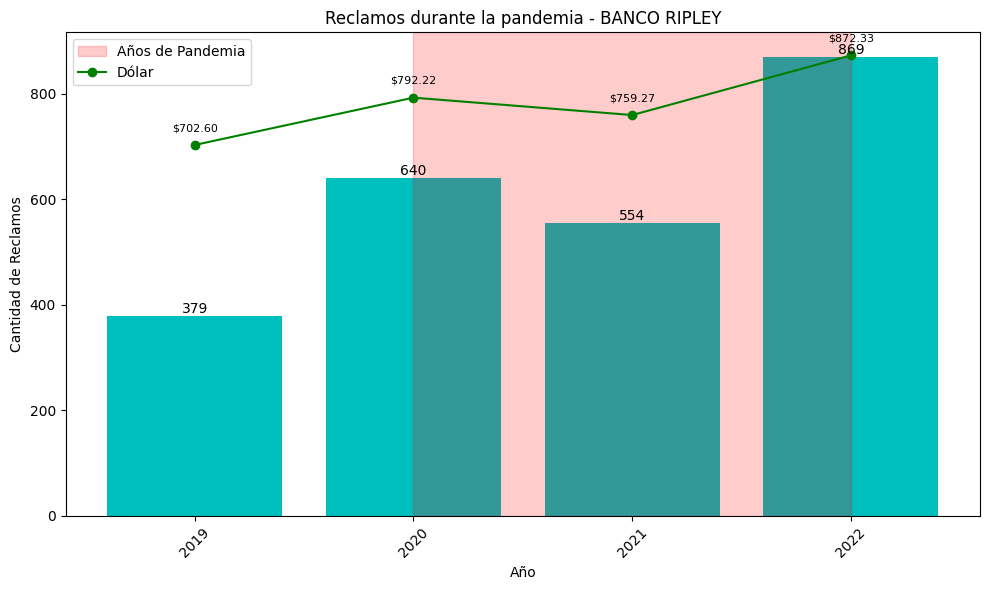

In [9]:


empresa = empresa_select.value
datos_empresa = df_empresas[df_empresas['name'] == empresa]



fig, ax1 = plt.subplots(figsize=(10, 6))

datos_no_2023 = datos_empresa[datos_empresa['year'] != 2023]

ax1.bar(datos_no_2023['year'], datos_no_2023['claims'], color='c')
ax1.set_title(f'Reclamos durante la pandemia - {empresa}')
ax1.set_xlabel('Año')
ax1.set_ylabel('Cantidad de Reclamos')
ax1.axvspan(2020, 2022, alpha=0.2, color='red', label='Años de Pandemia')

ax1.set_xticks(datos_no_2023['year'])
ax1.set_xticklabels(datos_no_2023['year'].astype(int), rotation=45)

for year, claims in zip(datos_no_2023['year'], datos_no_2023['claims']):
    ax1.text(year, claims, str(claims), ha='center', va='bottom')


ax1.plot(df_dolar['Anio'], df_dolar['ValorDolar'], marker='o', linestyle='-', color='green', label='Dólar')

for i, row in df_dolar.iterrows():
    ax1.annotate(f"${row['ValorDolar']:.2f}", (row['Anio'], row['ValorDolar']), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

ax1.legend()
plt.tight_layout()
plt.show()

In [7]:
#df = pd.read_csv(r'comportamiento-empresas.csv')
#df['name'] = df['name'].str.upper()
#remove_2023_mask = df['year'] < 2023
#df = df[remove_2023_mask]


In [10]:
pib_data = df_indices[df_indices['nombre'] == 'PIB']
ipc_data = df_indices[df_indices['nombre'] == 'IPC']
iac_data = df_indices[df_indices['nombre'] == 'IAC']

ventas_data = df_indices[df_indices['nombre'] == 'VENTAS RETAIL']

In [11]:

data = pd.read_csv(r'indices.csv')

pib_data = data[data['nombre'] == 'PIB']
ipc_data = data[data['nombre'] == 'IPC']
iac_data = data[data['nombre'] == 'IAC']


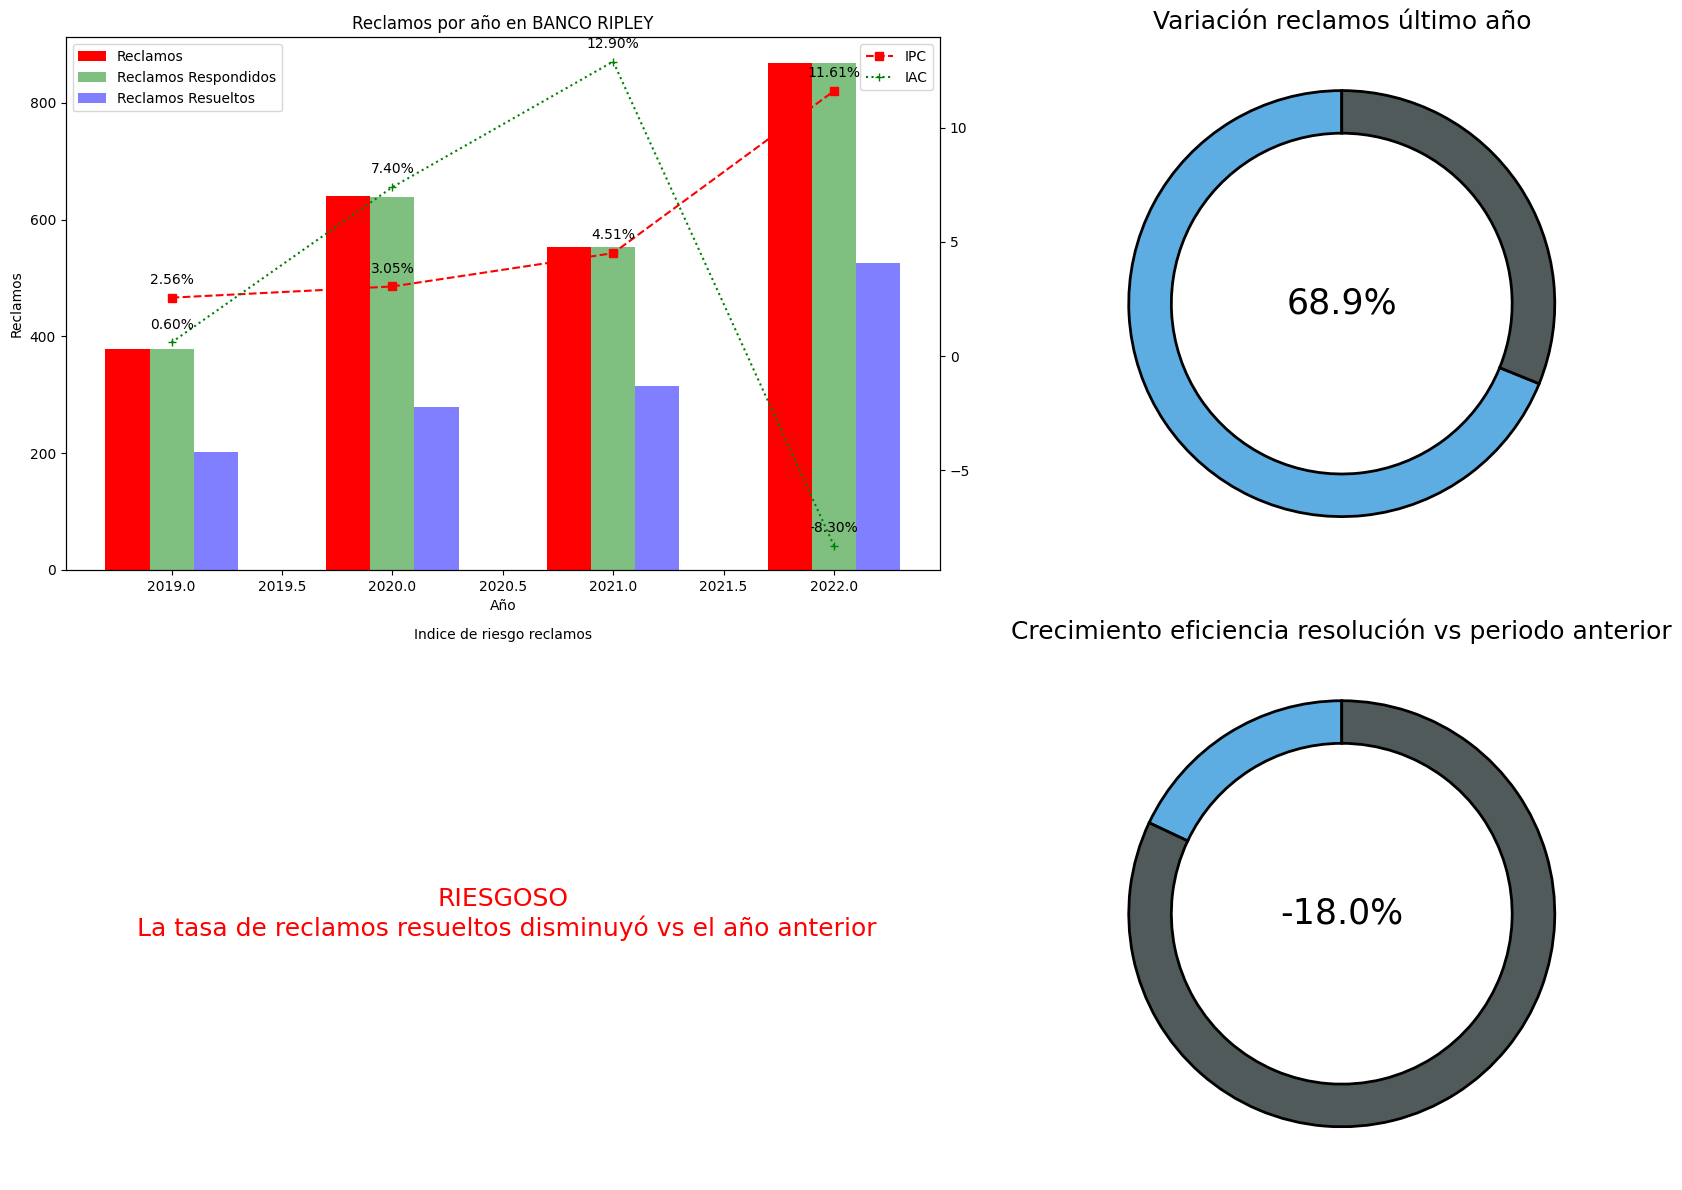

In [12]:
name = empresa
year_risk = ano_select.value

color_1 = 'red'
color_2 = 'blue'

fig, ax = plt.subplots(2,2,figsize=(18, 12), tight_layout=True)

df = df_empresas

ax[0][0].bar(df[df['name'] == name]['year'] - 0.2, df[df['name'] == name]['claims'], width=0.2, color=color_1, label="Reclamos")
ax[0][0].set_xlabel('Año')
ax[0][0].set_ylabel('Reclamos')
ax[0][0].set_title(f'Reclamos por año en {name}')

plt.xticks(df[df['name'] == name]['year'])

ax[0][0].bar(df[df['name'] == name]['year'] + 0., df[df['name'] == name]['claims'] * (df[df['name'] == name]['response mean']/100),
       width=0.2,
       color='green',
       alpha=0.5,
       label="Reclamos Respondidos")

ax[0][0].bar(df[df['name'] == name]['year'] + 0.2, (df[df['name'] == name]['solved mean']/100)*(df[df['name'] == name]['claims'] * (df[df['name'] == name]['response mean']/100)),
       width=0.2,
       color=color_2,
       alpha=0.5,
       label="Reclamos Resueltos")

ax[0][0].legend(loc='upper left')

ax2 = ax[0][0].twinx()

#ax2.plot(pib_data['anio'], pib_data['valor'], label='PIB', marker='o', linestyle='-', color='blue')

#ax2.legend()
ax2.plot(ipc_data['anio'], ipc_data['valor'], label='IPC', marker='s', linestyle='--', color='red')

ax2.legend()
ax2.plot(iac_data['anio'], iac_data['valor'], label='IAC', marker='+', linestyle=':', color='green')

ax2.legend()

for  i, data in enumerate([ipc_data, iac_data]):
    for (x, y) in (zip(data['anio'], data['valor'])):
        label = f'{y:.2f}%'
        ax2.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

ax2.legend()

if year_risk > 2019:
    tasa = (df[df['name'] == name][df['year']==year_risk]['claims'].values[0] - df[df['name'] == name][df['year']==int(year_risk)-1]['claims'].values[0]) / df[df['name'] == name][df['year']==int(year_risk)-1]['claims'].values[0]
    wedgeprops = {'width':0.2, 'edgecolor':'black', 'linewidth':2}
    if (abs(tasa)*100) > 100:

        ax[0][1].pie([100, 0], wedgeprops=wedgeprops, startangle=90, colors=['#5DADE2', '#515A5A'])
    else:
        ax[0][1].pie([abs(tasa)*100, 100-(abs(tasa)*100)], wedgeprops=wedgeprops, startangle=90, colors=['#5DADE2', '#515A5A'])
    ax[0][1].set_title('Variación reclamos último año', fontsize=18, loc='center')
    ax[0][1].text(0, 0, f"{round(tasa*100, 1)}%", ha='center', va='center', fontsize=25)

    eficiencia_resolucion = (df[df['name'] == name][df['year']==year_risk]['solved mean'].values[0] - df[df['name'] == name][df['year']==int(year_risk)-1]['solved mean'].values[0]) / df[df['name'] == name][df['year']==int(year_risk)-1]['solved mean'].values[0]

    wedgeprops = {'width':0.2, 'edgecolor':'black', 'linewidth':2}
    if (abs(eficiencia_resolucion)*100) > 100:

        ax[1][1].pie([100, 0], wedgeprops=wedgeprops, startangle=90, colors=['#5DADE2', '#515A5A'])
    else:
        ax[1][1].pie([abs(eficiencia_resolucion)*100, 100-(abs(eficiencia_resolucion)*100)], wedgeprops=wedgeprops, startangle=90, colors=['#5DADE2', '#515A5A'])
    ax[1][1].set_title('Crecimiento eficiencia resolución vs periodo anterior', fontsize=18, loc='center')
    ax[1][1].text(0, 0, f"{round(eficiencia_resolucion*100, 1)}%", ha='center', va='center', fontsize=25)

company = df[df['name'] == name]
#display(company[company['year'] == year_risk])
ax[1][0].axis('off')

ax[1][0].set_title('Indice de riesgo reclamos', fontsize=10, loc='center')
if int(company[company['year'] == year_risk]['mean days'].values[0]) > 7:

    ax[1][0].text(0.5, 0.5, f"RIESGOSO: Demoras más de 7 días en\n promedio en dar solución a los reclamos", ha='center', va='center', fontsize=18, color='red')
else:

    if (company[company['year'] == year_risk]['solved mean'].values[0]) < (company[company['year'] == year_risk]['market mean solved'].values[0]):
        #
        if (year_risk > 2019) and (company[company['year'] == year_risk]['solved mean'].values[0] < company[company['year'] == year_risk-1]['solved mean'].values[0] ):

            ax[1][0].text(0.5, 0.5, "RIESGOSO\n La tasa de reclamos resueltos disminuyó vs el año anterior", ha='center', va='center', fontsize=18, color='red')

        else:

            ax[1][0].text(0.5, 0.5, "Riesgo Medio\n Has dado menos solución a los reclamos comparado con el promedio del mercado", ha='center', va='center', fontsize=18, color='orange')
    else:
        ax[1][0].text(0.5, 0.5, "Situacion normal", ha='center', va='center', fontsize=18, color='green')
plt.show()


In [ ]:


#fig, axes = plt.subplots(3, 1, figsize=(11, 8), sharex=True)


#axes[0].plot(pib_data['anio'], pib_data['valor'], label='PIB', marker='o', linestyle='-', color='blue')
#axes[0].set_title('PIB')
#axes[0].legend()


#axes[1].plot(ipc_data['anio'], ipc_data['valor'], label='IPC', marker='s', linestyle='--', color='red')
#axes[1].set_title('IPC')
#axes[1].legend()


#axes[2].plot(iac_data['anio'], iac_data['valor'], label='IAC', marker='+', linestyle=':', color='green')
#axes[2].set_title('IAC')
#axes[2].legend()

#for ax, data in zip(axes, [pib_data, ipc_data, iac_data]):
#    for x, y in zip(data['anio'], data['valor']):
#        label = f'{y:.2f}%'
#        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')


#plt.suptitle('Valores del PIB, IPC e IAC en los últimos 4 años')
#plt.xlabel('Año')
#for ax in axes:
#    ax.set_ylabel('Valor %')


#plt.xticks(list(data['anio'].unique()), rotation=45)

#plt.tight_layout()
#plt.show()
